In [ ]:
import pandas as pd                 # Data tables
import os                           # Returns current directory, create files
import numpy as np                  # Arrays
import matplotlib.pyplot as plt	    # Graphs

from math import sqrt, atan, log, exp, sin, cos, tan

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import *

from Heat_loads_solar_sloping_window_CLF_241121 import *

pd.options.display.max_columns = 999

In [ ]:
# pip install pyvista

In [ ]:
# pip install pyviewfactor

# DATA

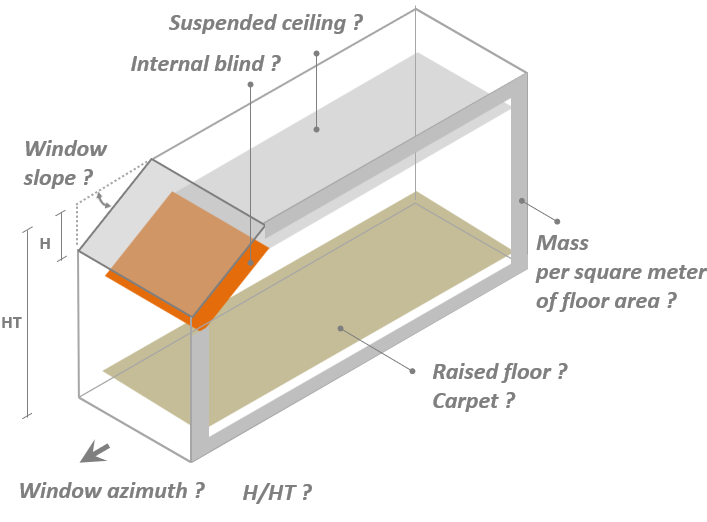

In [ ]:
# Internal blind : 1 = True, 0 = False
internal_blind    = 0

# Wall thermal mass accessibility from internal side: 1 = True, 0 = False
suspended_ceiling = 0
raised_floor      = 0
carpet            = 0

# Average Specific mass per square meter of internal floor area, in [kg/m2] 
M_A               = 387.32

# Azimuth of the window, in deg  (South = 0, West = 90, North = 180, East = -90)
azimuth_wd_deg    = 90

# Window proportional factor: ratio Height/Breadth
H_HT              = 0.3

slope_wd_deg = 30

In [ ]:
# Month comprised between 1 and 12
month = 7

# Daily Plant operating hours comprised between 0 and 24 h (0 to 24 h for continuous operating system)
hour_start_plant  = 0
hour_stop_plant   = 24

In [ ]:
dfl, dfp, dfc, I_t_wd_day_max = CLF(internal_blind, suspended_ceiling, raised_floor, carpet, \
          M_A, azimuth_wd_deg, H_HT, slope_wd_deg, month, hour_start_plant, hour_stop_plant, method="LSODA")

# Default : method="LSODA"
# Other   :  method="Radau", method="RK45" 

In [ ]:
%matplotlib inline
plt.figure(figsize = (8,4))
plt.xticks(np.arange(0, dfl['hour_per'].values[-1] + 1 , 1))
# plt.fill_between(dfl['hour_per'], 0*dfl['SF'], dfl['SF'], color= 'grey', alpha=.30, label="Shading Factor")
plt.plot(dfl['hour_per'], dfl['GF'], color= 'C1', linewidth=2.0, label="Gains Factor")
plt.plot(dfl['hour_per'], dfl['CLF'], color= 'C0', linewidth=2.0, label="Cooling Load Factor")
plt.xlabel('Hour')
plt.ylabel('Factors')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.grid(linestyle= 'dotted')

In [ ]:
dfp.T

In [ ]:
print("Maximum solar intensity on window for the considered month         :", round(I_t_wd_day_max,1), "(W/m2)")

In [ ]:
dfc.T.to_clipboard(index=False)